# Computer Vision Histograms

### Import statements

In [2]:
import cv2
import numpy as np

## Histograms

In [4]:
# Load some images, calculate and plot their color histograms, one color at the time
# try it with different color spaces BGR, HSV, etc
names = [ 'day3.jpg', 'night3.png','day4.jpg', 'night4.jpg', 'day1.jpg', 'night1.jpg', 'day2.jpg', 'night2.jpg']
img_vect_BGR = []
img_vect_HSV = []
img_vect_RGB = []
for name in names:
  img_temp = cv2.imread(name)
  img_vect_BGR.append(img_temp)
  img_vect_HSV.append(cv2.cvtColor(img_temp, cv2.COLOR_BGR2HSV))
  img_vect_RGB.append(cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB))

[Hint](# "cv2.calcHist") 


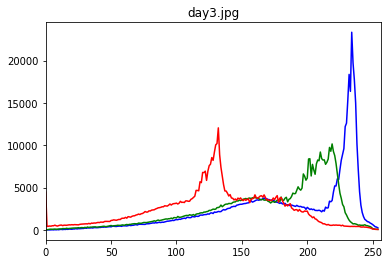

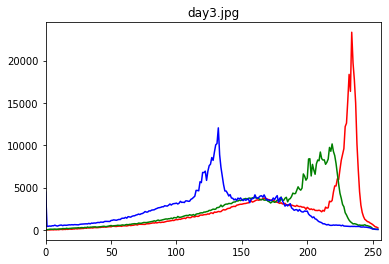

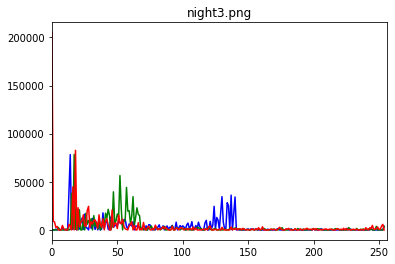

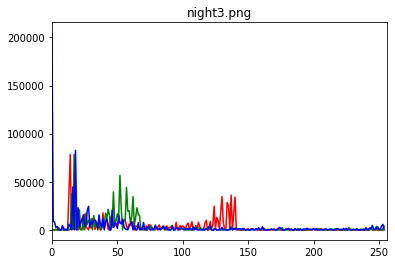

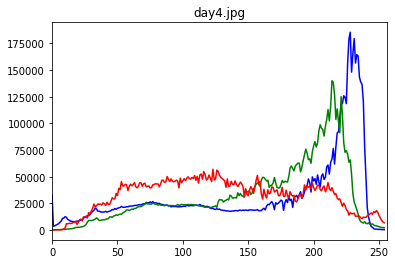

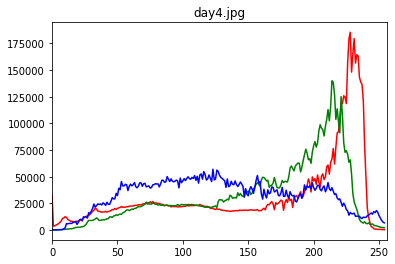

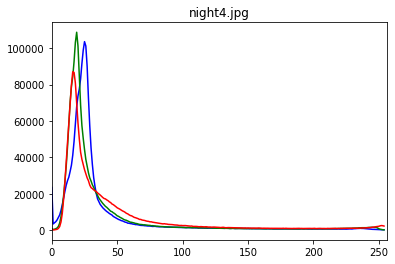

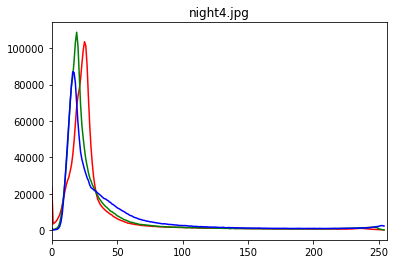

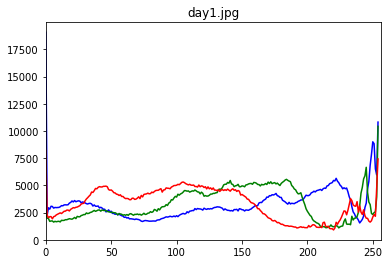

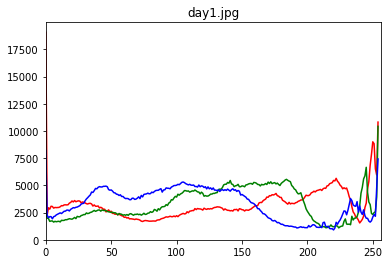

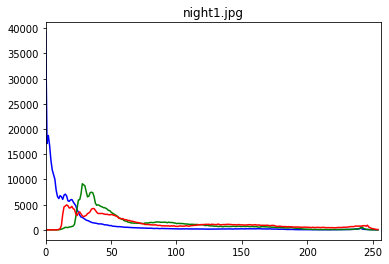

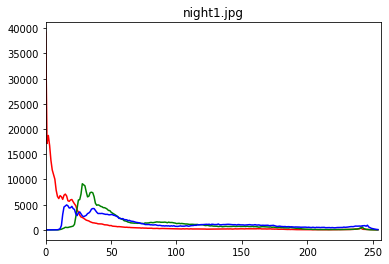

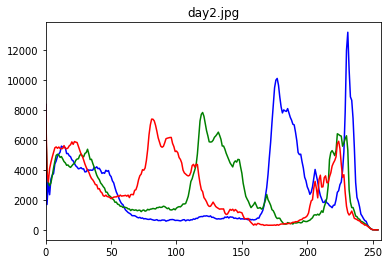

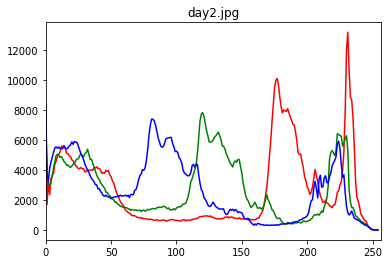

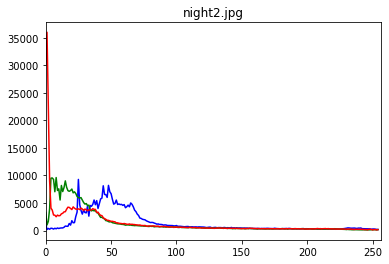

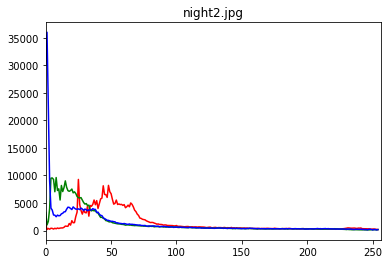

In [20]:
# Now try to plot all 3 channels at the same time, does the histogram give you an idea of what the image looks like?
import matplotlib.pyplot as plt
def plot_hist(image, name, channels = 'bgr'):
  if channels == 'bgr': 
    colors = ['b','g','r']
  elif channels == 'rgb':
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    colors = ['r','g','b']
  for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [255], [0,255])
    plt.title(name)
    plt.plot(hist, color=color)
    plt.xlim(0,256)
  plt.show()

for i,k, name in zip(img_vect_BGR, img_vect_RGB, names):
  plot_hist(i, name,'bgr')
  plot_hist(k, name,'rgb')


## Mini project

### Level 1

#### Image classifier

1. By using only computer vision techniques (no Neural Networks and ML are not allowed) create a binary classifier that can detect if a picutre was taken during the day, you can use the images day/night in the img folder or feel free to add your own images.

In [ ]:
!ls img

blue-flowers.jpg     day3.jpg             night3.png
blue-red-flowers.png day4.jpg             night4.jpg
day1.jpg             night1.jpg           purple-flowers.jpg
day2.jpg             night2.jpg


In [43]:
image = cv2.imread('night4.jpg')
detect_phase(image)

'NIGHT'

In [40]:
def detect_phase(image):
  colors = ['r','g','b']
  color_value = []
  for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [255], [0,255])
    color_value.append(hist)
  color_value
  result = "NIGHT"
  for j in range(0,3,1):
    for i in range(200, 250, 1):
      if color_value[j][i] > 5000:
        result = "DAY"
        break
  return result


### Level 2

#### Image Classifier

1. This should be an easy one, change the classifier so it can also detect night pictures